In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Loading data

In [5]:
mnist = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

# Processing data

In [2]:
X, y = mnist['data'][60000:-1,:], mnist['target'][60000:-1]
print(X.shape, y.shape)
X_train_80,X_test_20,y_train_80,y_test_20 = train_test_split(X,y,test_size=0.2, random_state = 42)
print(X_train_80.shape, X_test_20.shape, y_train_80.shape, y_test_20.shape)

X_train_50,X_test_50,y_train_50,y_test_50 = train_test_split(X,y,test_size=0.5, random_state = 42)
print(X_train_50.shape, X_test_50.shape, y_train_50.shape, y_test_50.shape)

X_train_20,X_test_80,y_train_20,y_test_80 = train_test_split(X,y,test_size=0.8, random_state = 42)
print(X_train_20.shape, X_test_80.shape, y_train_20.shape, y_test_80.shape)


(9999, 784) (9999,)
(7999, 784) (2000, 784) (7999,) (2000,)
(4999, 784) (5000, 784) (4999,) (5000,)
(1999, 784) (8000, 784) (1999,) (8000,)


In [3]:
def draw_heatmap(score, lists, acc_desc, hyper_p):
    fig, ax = plt.subplots(figsize=(2,4))
    ax = sns.heatmap(score, annot=True, fmt='.3f', yticklabels=lists, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    plt.title(acc_desc)
    ax.set(xlabel=hyper_p)


# Support Vector Machine

## (i) Using 80% training data, 20% testing data

### 1. Training model

In [4]:
# parameter C's
C_list = [10**(4),10**(2), 1, 10**(-2), 10**(-4)];
svc = LinearSVC()
grid = GridSearchCV(svc, [{'C':C_list}], cv=3, scoring='accuracy', return_train_score = True)
grid.fit(X_train_80, y_train_80)

GridSearchCV(cv=3, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [10000, 100, 1, 0.01, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'C': 0.0001} with accuracy 0.865


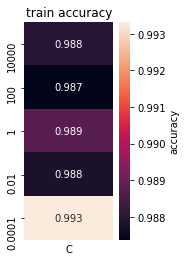

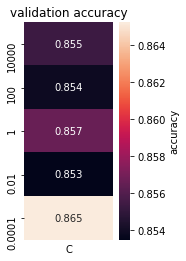

In [5]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_svm_1 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_svm_1 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_svm_1, C_list, 'train accuracy', 'C')
draw_heatmap(val_acc_svm_1, C_list, 'validation accuracy', 'C')

### 3. Test model accuracy

In [6]:
y_hat_svm_1 = grid.predict(X_test_20)
print('test accuracy is %.3f' %accuracy_score(y_test_20, y_hat_svm_1))

test accuracy is 0.884


## (ii) Using 50% training data, 50% testing data

### 1. Training model

In [7]:
grid.fit(X_train_50, y_train_50)

GridSearchCV(cv=3, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [10000, 100, 1, 0.01, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'C': 0.0001} with accuracy 0.845


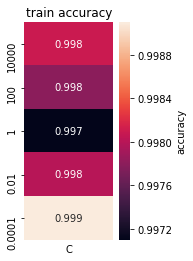

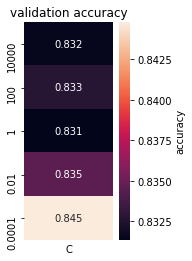

In [8]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_svm_2 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_svm_2 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_svm_2, C_list, 'train accuracy', 'C')
draw_heatmap(val_acc_svm_2, C_list, 'validation accuracy', 'C')

### 3. Test model accuracy

In [9]:
y_hat_svm_2 = grid.predict(X_test_50)
print('test accuracy is %0.3f' %accuracy_score(y_test_50, y_hat_svm_2))

test accuracy is 0.872


## (iii) Using 20% training data, 80% testing data

### 1. Training model

In [10]:
grid.fit(X_train_20, y_train_20)

GridSearchCV(cv=3, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [10000, 100, 1, 0.01, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'C': 0.0001} with accuracy 0.844


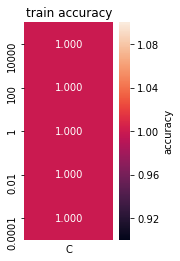

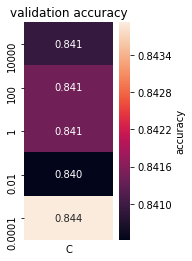

In [11]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_svm_3 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_svm_3 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_svm_3, C_list, 'train accuracy', 'C')
draw_heatmap(val_acc_svm_3, C_list, 'validation accuracy', 'C')

### 3. Test model accuracy

In [12]:
y_hat_svm_3 = grid.predict(X_test_80)
print('test accuracy is %0.3f' %accuracy_score(y_test_80, y_hat_svm_3))

test accuracy is 0.846


# K-nearest Neighbors 

## (i) Using 80% training data, 20% testing data

### 1. Training model

In [15]:
n_neighbors_list = [1,2,3,4,5]
knn = KNeighborsClassifier(algorithm = 'kd_tree')
grid = GridSearchCV(knn, [{'n_neighbors':n_neighbors_list}], cv=3, scoring='accuracy', return_train_score = True)
grid.fit(X_train_80, y_train_80)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'n_neighbors': 1} with accuracy 0.943


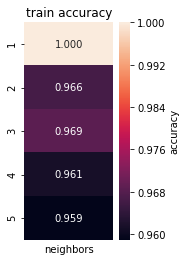

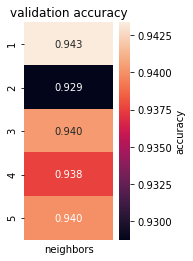

In [16]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_knn_1 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_knn_1 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_knn_1, n_neighbors_list, 'train accuracy', 'neighbors')
draw_heatmap(val_acc_knn_1, n_neighbors_list, 'validation accuracy', 'neighbors')

### 3. Test model accuracy

In [17]:
y_hat_knn_1 = grid.predict(X_test_20)
print('test accuracy is %0.3f' %accuracy_score(y_test_20, y_hat_knn_1))

test accuracy is 0.954


## (ii) Using 50% training data, 50% testing data

### 1. Training model

In [18]:
grid.fit(X_train_50, y_train_50)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'n_neighbors': 3} with accuracy 0.927


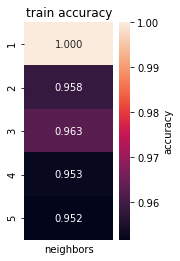

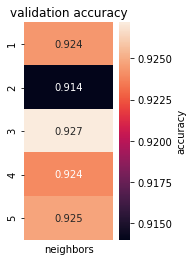

In [20]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_knn_2 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_knn_2 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_knn_2, n_neighbors_list, 'train accuracy', 'neighbors')
draw_heatmap(val_acc_knn_2, n_neighbors_list, 'validation accuracy', 'neighbors')

### 3. Test model accuracy

In [21]:
y_hat_knn_2 = grid.predict(X_test_50)
print('test accuracy is %0.3f' %accuracy_score(y_test_50, y_hat_knn_2))

test accuracy is 0.945


## (iii) Using 20% training data, 80% testing data

### 1. Training model

In [22]:
grid.fit(X_train_20, y_train_20)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'n_neighbors': 1} with accuracy 0.894


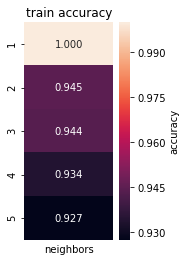

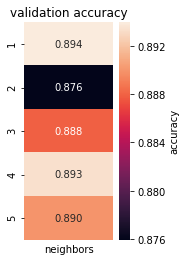

In [23]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_knn_3 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_knn_3 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_knn_3, n_neighbors_list, 'train accuracy', 'neighbors')
draw_heatmap(val_acc_knn_3, n_neighbors_list, 'validation accuracy', 'neighbors')

### 3. Test model accuracy

In [24]:
y_hat_knn_3 = grid.predict(X_test_80)
print('test accuracy is %0.3f' %accuracy_score(y_test_80, y_hat_knn_3))

test accuracy is 0.921


# Decision Tree

## (i) Using 80% training data, 20% testing data

### 1. Training model

In [27]:
max_depth_list = [1,10,20,30,40]
dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, [{'max_depth':max_depth_list}], cv=3, scoring='accuracy', return_train_score = True)
grid.fit(X_train_80, y_train_80)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 10, 20, 30, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'max_depth': 20} with accuracy 0.780


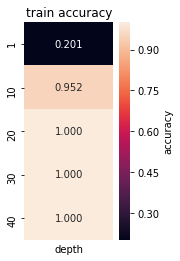

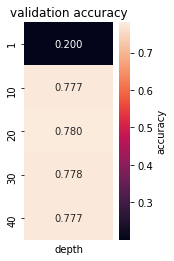

In [28]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_dt_1 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_dt_1 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_dt_1, max_depth_list, 'train accuracy', 'depth')
draw_heatmap(val_acc_dt_1, max_depth_list, 'validation accuracy', 'depth')

### 3. Test model accuracy

In [29]:
y_hat_dt_1 = grid.predict(X_test_20)
print('test accuracy is %0.3f' %accuracy_score(y_test_20, y_hat_dt_1))

test accuracy is 0.814


## (ii) Using 50% training data, 50% testing data

### 1. Training model

In [30]:
grid.fit(X_train_50, y_train_50)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 10, 20, 30, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'max_depth': 40} with accuracy 0.752


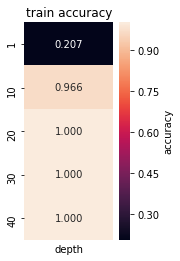

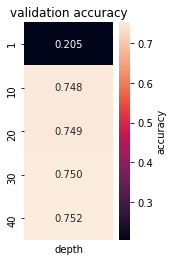

In [31]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_dt_2 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_dt_2 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_dt_2, max_depth_list, 'train accuracy', 'depth')
draw_heatmap(val_acc_dt_2, max_depth_list, 'validation accuracy', 'depth')

### 3. Test model accuracy

In [32]:
y_hat_dt_2 = grid.predict(X_test_50)
print('test accuracy is %0.3f' %accuracy_score(y_test_50, y_hat_dt_2))

test accuracy is 0.780


## (iii) Using 20% training data, 80% testing data

### 1. Training model

In [33]:
grid.fit(X_train_20, y_train_20)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 10, 20, 30, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'max_depth': 40} with accuracy 0.689


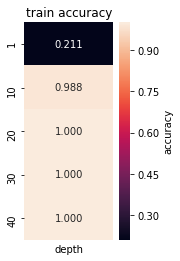

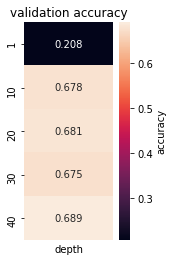

In [34]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_dt_3 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_dt_3 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_dt_3, max_depth_list, 'train accuracy', 'depth')
draw_heatmap(val_acc_dt_3, max_depth_list, 'validation accuracy', 'depth')

### 3. Test model accuracy

In [35]:
y_hat_dt_3 = grid.predict(X_test_80)
print('test accuracy is %0.3f' %accuracy_score(y_test_80, y_hat_dt_3))

test accuracy is 0.726


# Random Forest

## (i) Using 80% training data, 20% testing data

### 1. Training model

In [36]:
rf = RandomForestClassifier(n_estimators=100)
max_depth_list = [1,10,20,30,40]
grid = GridSearchCV(rf, [{'max_depth':max_depth_list}], cv=3, scoring='accuracy', return_train_score = True)
grid.fit(X_train_80, y_train_80)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 10, 20, 30, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'max_depth': 40} with accuracy 0.947


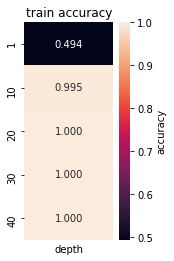

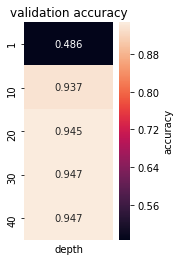

In [37]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_rf_1 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_rf_1 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_rf_1, max_depth_list, 'train accuracy', 'depth')
draw_heatmap(val_acc_rf_1, max_depth_list, 'validation accuracy', 'depth')

### 3. Test model accuracy

In [38]:
y_hat_rf_1 = grid.predict(X_test_20)
print('test accuracy is %0.3f' %accuracy_score(y_test_20, y_hat_rf_1))

test accuracy is 0.953


## (ii) Using 50% training data, 50% testing data

### 1. Training model

In [39]:
grid.fit(X_train_50, y_train_50)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 10, 20, 30, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'max_depth': 20} with accuracy 0.937


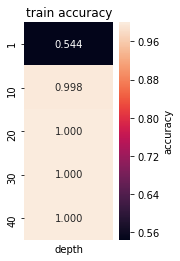

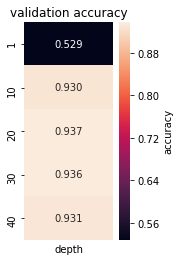

In [40]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_rf_2 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_rf_2 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_rf_2, max_depth_list, 'train accuracy', 'depth')
draw_heatmap(val_acc_rf_2, max_depth_list, 'validation accuracy', 'depth')

### 3. Test model accuracy

In [41]:
y_hat_rf_2 = grid.predict(X_test_50)
print('test accuracy is %0.3f' %accuracy_score(y_test_50, y_hat_rf_2))

test accuracy is 0.947


## (iii) Using 20% training data, 80% testing data

### 1. Training model

In [42]:
grid.fit(X_train_20, y_train_20)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 10, 20, 30, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'max_depth': 20} with accuracy 0.905


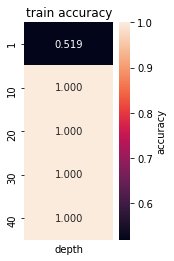

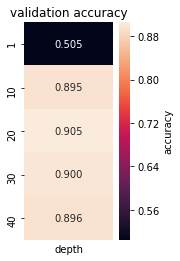

In [43]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_rf_3 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_rf_3 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_rf_3, max_depth_list, 'train accuracy', 'depth')
draw_heatmap(val_acc_rf_3, max_depth_list, 'validation accuracy', 'depth')

### 3. Test model accuracy

In [44]:
y_hat_rf_3 = grid.predict(X_test_80)
print('test accuracy is %0.3f' %accuracy_score(y_test_80, y_hat_rf_3))

test accuracy is 0.925


# Logistic Regression

## (i) Using 80% training data, 20% testing data

### 1. Training model

In [45]:
lr = LogisticRegression()
C_list = [10**(4),10**(2), 1, 10**(-2), 10**(-4)];
grid = GridSearchCV(lr, [{'C':C_list}], cv=3, scoring='accuracy', return_train_score = True)
grid.fit(X_train_80, y_train_80)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [10000, 100, 1, 0.01, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'C': 0.0001} with accuracy 0.890


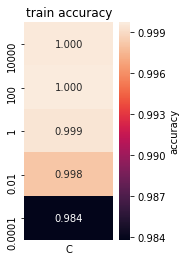

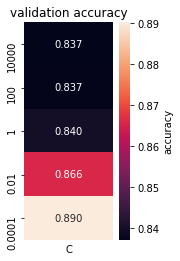

In [46]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_lr_1 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_lr_1 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_lr_1, C_list, 'train accuracy', 'C')
draw_heatmap(val_acc_lr_1, C_list, 'validation accuracy', 'C')

### 3. Test model accuracy

In [47]:
y_hat_lr_1 = grid.predict(X_test_20)
print('test accuracy is %0.3f' %accuracy_score(y_test_20, y_hat_lr_1))

test accuracy is 0.902


## (ii) Using 50% training data, 50% testing data

### 1. Training model

In [48]:
grid.fit(X_train_50, y_train_50)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [10000, 100, 1, 0.01, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'C': 0.0001} with accuracy 0.880


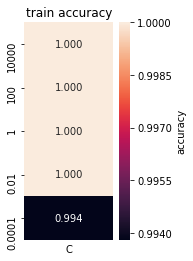

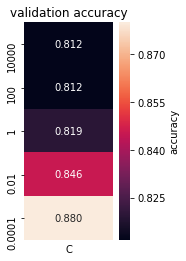

In [49]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_lr_2 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_lr_2 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_lr_2, C_list, 'train accuracy', 'C')
draw_heatmap(val_acc_lr_2, C_list, 'validation accuracy', 'C')

### 3. Test model accuracy

In [50]:
y_hat_lr_2 = grid.predict(X_test_50)
print('test accuracy is %0.3f' %accuracy_score(y_test_50, y_hat_lr_2))

test accuracy is 0.895


## (iii) Using 20% training data, 80% testing data

### 1. Training model

In [51]:
grid.fit(X_train_20, y_train_20)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [10000, 100, 1, 0.01, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'C': 0.0001} with accuracy 0.866


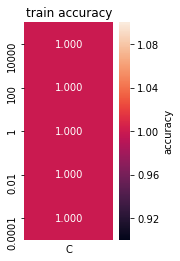

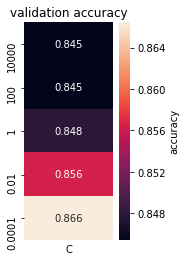

In [52]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_lr_3 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_lr_3 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_lr_3, C_list, 'train accuracy', 'C')
draw_heatmap(val_acc_lr_3, C_list, 'validation accuracy', 'C')

### 3. Test model accuracy

In [53]:
y_hat_lr_3 = grid.predict(X_test_80)
print('test accuracy is %0.3f' %accuracy_score(y_test_80, y_hat_lr_3))

test accuracy is 0.877
